In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import math
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Read the dataset into a Pandas DataFrame

df = pd.read_csv('/content/drive/MyDrive/Russell2000.csv')

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'].str[:10])

df


,Date,Open,High,Low,Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,1430800000
4,2001-01-06,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
8481,2024-03-23,NaN,NaN,NaN,NaN,0
8482,2024-03-24,NaN,NaN,NaN,NaN,0
8483,2024-03-25,2075.060059,2088.479980,2074.159912,2074.159912,3331360000
8484,2024-03-26,2083.439941,2093.520020,2070.000000,2070.159912,3871790000


In [4]:

df['Date'] = pd.to_datetime(df['Date'])

# Filter rows where 'Open' column is not NaN
df = df[df['Open'].notna()]

# Reset index
df.reset_index(drop=True, inplace=True)

# Display the modified DataFrame
df



,Date,Open,High,Low,Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,1115500000
...,...,...,...,...,...,...
5840,2024-03-21,2087.850098,2106.310059,2087.850098,2098.560059,4207730000
5841,2024-03-22,2098.030029,2099.110107,2071.790039,2072.000000,3374700000
5842,2024-03-25,2075.060059,2088.479980,2074.159912,2074.159912,3331360000
5843,2024-03-26,2083.439941,2093.520020,2070.000000,2070.159912,3871790000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5845 non-null   datetime64[ns]
 1   Open    5845 non-null   float64       
 2   High    5845 non-null   float64       
 3   Low     5845 non-null   float64       
 4   Close   5845 non-null   float64       
 5   Volume  5845 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 274.1 KB


In [6]:
df.shape


(5845, 6)

In [7]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of DowJones',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

plot_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=plot_data, layout=layout)


iplot(plot)

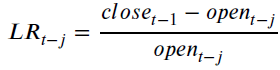

Where,
       


*   t is the orbservation at time 't'
*   𝑗 ∈ {1, 2, 3, 4, 5, 21, 63, 126, 252}
*   LR is the Lagged Returns



In [8]:
def calculate_lagged_returns(df, window_sizes):
    for window_size in window_sizes:

        lagged_returns = (df['Close'].shift(1) - df['Open'].shift(window_size)) / df['Open'].shift(window_size)
        lagged_returns_name = f'LR_{window_size}'
        df[lagged_returns_name] = lagged_returns
    return df


window_sizes = [1, 2, 3, 4, 5, 21, 63, 126, 252]

df_with_lagged_returns = calculate_lagged_returns(df, window_sizes)

df_with_lagged_returns


<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b511>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-8-1c7c2211b51

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,1129400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,188070000,-0.043553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,216940000,0.047352,0.001737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,1430800000,-0.014843,0.031806,-0.013132,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,1115500000,-0.029464,-0.043870,0.001405,-0.042209,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,2087.850098,2106.310059,2087.850098,2098.560059,4207730000,0.021917,0.031237,0.016042,0.026848,0.005135,0.040854,0.039347,0.131070,0.177658
5841,2024-03-22,2098.030029,2099.110107,2071.790039,2072.000000,3374700000,0.005130,0.033580,0.043006,0.027638,0.038567,0.047442,0.040503,0.168971,0.181282
5842,2024-03-25,2075.060059,2088.479980,2074.159912,2074.159912,3331360000,-0.012407,-0.007592,0.020499,0.029806,0.014632,0.030103,0.032994,0.159148,0.195270
5843,2024-03-26,2083.439941,2093.520020,2070.000000,2070.159912,3871790000,-0.000434,-0.011377,-0.006557,0.021562,0.030879,0.030418,0.022650,0.172723,0.211931


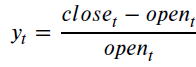

Where,
       


*   t is the orbservation at time 't'
*   y is the Target_variable



In [9]:
# Add the target variable column to the DataFrame

df_with_target_variable = df_with_lagged_returns.copy()
df_with_target_variable['Target_variable'] = (df_with_target_variable['Close'] - df_with_target_variable['Open']) / df_with_target_variable['Open']
df_with_target_variable


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,1129400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043553
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,188070000,-0.043553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047352
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,216940000,0.047352,0.001737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.014843
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,1430800000,-0.014843,0.031806,-0.013132,NaN,NaN,NaN,NaN,NaN,NaN,-0.029464
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,1115500000,-0.029464,-0.043870,0.001405,-0.042209,NaN,NaN,NaN,NaN,NaN,-0.003239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,2087.850098,2106.310059,2087.850098,2098.560059,4207730000,0.021917,0.031237,0.016042,0.026848,0.005135,0.040854,0.039347,0.131070,0.177658,0.005130
5841,2024-03-22,2098.030029,2099.110107,2071.790039,2072.000000,3374700000,0.005130,0.033580,0.043006,0.027638,0.038567,0.047442,0.040503,0.168971,0.181282,-0.012407
5842,2024-03-25,2075.060059,2088.479980,2074.159912,2074.159912,3331360000,-0.012407,-0.007592,0.020499,0.029806,0.014632,0.030103,0.032994,0.159148,0.195270,-0.000434
5843,2024-03-26,2083.439941,2093.520020,2070.000000,2070.159912,3871790000,-0.000434,-0.011377,-0.006557,0.021562,0.030879,0.030418,0.022650,0.172723,0.211931,-0.006374


In [10]:
df = df_with_target_variable.dropna()
df

,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
252,2002-01-08,493.190002,497.899994,491.209991,497.899994,1258800000,-0.013541,-0.004702,0.012295,0.009580,-0.000891,0.028701,0.188471,-0.011743,0.019915,0.009550
253,2002-01-09,497.899994,503.079987,494.739990,494.739990,1452000000,0.009550,-0.004100,0.004823,0.021983,0.019243,0.032495,0.207967,0.002154,0.076564,-0.006347
254,2002-01-10,494.739990,495.510010,493.450012,495.309998,1299000000,-0.006347,0.003143,-0.010421,-0.001554,0.015497,0.028117,0.210580,0.004079,0.021367,0.001152
255,2002-01-11,495.309998,496.570007,489.929993,489.940002,1211900000,0.001152,-0.005202,0.004299,-0.009281,-0.000404,0.044561,0.174667,0.024935,0.037951,-0.010842
256,2002-01-14,489.940002,489.940002,482.279999,483.010010,1286400000,-0.010842,-0.009702,-0.015987,-0.006590,-0.020022,0.031952,0.136646,0.008148,0.057866,-0.014145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,2087.850098,2106.310059,2087.850098,2098.560059,4207730000,0.021917,0.031237,0.016042,0.026848,0.005135,0.040854,0.039347,0.131070,0.177658,0.005130
5841,2024-03-22,2098.030029,2099.110107,2071.790039,2072.000000,3374700000,0.005130,0.033580,0.043006,0.027638,0.038567,0.047442,0.040503,0.168971,0.181282,-0.012407
5842,2024-03-25,2075.060059,2088.479980,2074.159912,2074.159912,3331360000,-0.012407,-0.007592,0.020499,0.029806,0.014632,0.030103,0.032994,0.159148,0.195270,-0.000434
5843,2024-03-26,2083.439941,2093.520020,2070.000000,2070.159912,3871790000,-0.000434,-0.011377,-0.006557,0.021562,0.030879,0.030418,0.022650,0.172723,0.211931,-0.006374


In [11]:
# Calculate the lengths for train, validation, and test sets
total_length = len(df)
train_length = int(total_length * 0.7)
validation_length = int(total_length * 0.15)

# Split the data into training, validation, and test sets
train_set = df.iloc[:train_length]
validation_set = df.iloc[train_length:train_length+validation_length]
test_set = df.iloc[train_length+validation_length:]

x_train = train_set.iloc[:, 6:-1].values
y_train = train_set.iloc[:, -1].values

x_valid = validation_set.iloc[:, 6:-1].values
y_valid = validation_set.iloc[:, -1].values

x_test = test_set.iloc[:, 6:-1].values
y_test = test_set.iloc[:, -1].values



In [12]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_valid: ",x_valid.shape)
print("y_valid: ",y_valid.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)


x_train:  (3915, 9)
y_train:  (3915,)
x_valid:  (838, 9)
y_valid:  (838,)
x_test:  (840, 9)
y_test:  (840,)


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
best_svr = grid_search.best_estimator_

In [15]:
# Print the best hyperparameters found from grid search

print("Best hyperparameters found from grid search:")
print(grid_search.best_params_)

Best hyperparameters found from grid search:
{'C': 100, 'epsilon': 0.01, 'gamma': 0.001}


In [16]:
best_model_path = "best_svr_model.pkl"
joblib.dump((best_svr, grid_search.best_params_), best_model_path)

drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/"

!cp best_svr_model.pkl "{drive_path}"

print(f"Model saved in Google Drive: {drive_path}best_svr_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved in Google Drive: /content/drive/MyDrive/best_svr_model.pkl


In [17]:
# Load best model and its hyperparameters
drive_path = "/content/drive/MyDrive/"

loaded_model_path = drive_path + "best_svr_model.pkl"
best_svr, best_hyperparameters_svr = joblib.load(loaded_model_path)
print("model loaded and stored in variable 'best_svr'")

print("Loaded hyperparameters:")
print(best_hyperparameters_svr)



model loaded and stored in variable 'best_svr'
Loaded hyperparameters:
{'C': 100, 'epsilon': 0.01, 'gamma': 0.001}


In [18]:
# Make predictions
y_train_pred = best_svr.predict(x_train)
y_valid_pred = best_svr.predict(x_valid)
y_test_pred = best_svr.predict(x_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


In [19]:
print("Train RMSE (SVR): ",train_rmse)
print("Validation RMSE (SVR): ",valid_rmse)
print("Test RMSE (SVR): ",test_rmse)


Train RMSE (SVR):  0.013958274276579386
Validation RMSE (SVR):  0.014529638596165234
Test RMSE (SVR):  0.013252511889343056


In [20]:
# Add the predicted target variable to the validation set with the new column name

validation_set['Target_prediction'] = y_valid_pred
validation_set


<ipython-input-20-59e6355016a7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction
4167,2017-07-27,1442.260010,1446.630005,1427.689941,1433.619995,4035740000,-0.005722,0.002377,0.004499,-0.000755,0.000083,0.018308,0.015998,0.043293,0.184663,-0.005991,-0.000002
4168,2017-07-28,1432.589966,1432.589966,1425.800049,1429.260010,3302850000,-0.005991,-0.011692,-0.003642,-0.001532,-0.006755,0.020762,0.011194,0.042117,0.176323,-0.002324,0.000334
4169,2017-07-31,1429.459961,1432.459961,1420.660034,1425.140015,3475930000,-0.002324,-0.009014,-0.014698,-0.006672,-0.004569,0.002645,0.020164,0.043644,0.174326,-0.003022,-0.000263
4170,2017-08-01,1426.030029,1430.660034,1420.819946,1428.329956,3470260000,-0.003022,-0.005200,-0.011870,-0.017538,-0.009535,0.005936,0.012504,0.054316,0.167860,0.001613,-0.000063
4171,2017-08-02,1428.030029,1428.030029,1408.520020,1412.900024,3487150000,0.001613,-0.000791,-0.002974,-0.009658,-0.015339,0.008373,0.020870,0.047109,0.171723,-0.010595,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,1747.020020,1785.339966,1747.020020,1785.339966,5295510000,0.019877,0.004637,0.002967,0.022028,0.055644,0.064426,0.099966,0.311042,0.094087,0.021934,-0.001100
5001,2020-11-17,1783.089966,1795.890015,1755.339966,1791.910034,4812180000,0.021934,0.044028,0.028428,0.026718,0.046230,0.090724,0.136841,0.349688,0.119960,0.004947,-0.001153
5002,2020-11-18,1792.760010,1805.199951,1769.319946,1769.319946,5284810000,0.004947,0.025695,0.047870,0.032212,0.030497,0.105728,0.142967,0.331562,0.123483,-0.013075,0.000617
5003,2020-11-19,1769.250000,1784.640015,1764.199951,1784.130005,4363370000,-0.013075,-0.007723,0.012765,0.034660,0.019199,0.093293,0.131735,0.311190,0.110378,0.008410,0.001231


In [21]:
# Add a new column 'Predicted_close' to validation_set

validation_set['Predicted_close'] = (validation_set['Target_prediction'] * validation_set['Open']) + validation_set['Open']
validation_set


<ipython-input-21-e78b35780010>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
4167,2017-07-27,1442.260010,1446.630005,1427.689941,1433.619995,4035740000,-0.005722,0.002377,0.004499,-0.000755,0.000083,0.018308,0.015998,0.043293,0.184663,-0.005991,-0.000002,1442.257637
4168,2017-07-28,1432.589966,1432.589966,1425.800049,1429.260010,3302850000,-0.005991,-0.011692,-0.003642,-0.001532,-0.006755,0.020762,0.011194,0.042117,0.176323,-0.002324,0.000334,1433.068349
4169,2017-07-31,1429.459961,1432.459961,1420.660034,1425.140015,3475930000,-0.002324,-0.009014,-0.014698,-0.006672,-0.004569,0.002645,0.020164,0.043644,0.174326,-0.003022,-0.000263,1429.083362
4170,2017-08-01,1426.030029,1430.660034,1420.819946,1428.329956,3470260000,-0.003022,-0.005200,-0.011870,-0.017538,-0.009535,0.005936,0.012504,0.054316,0.167860,0.001613,-0.000063,1425.939878
4171,2017-08-02,1428.030029,1428.030029,1408.520020,1412.900024,3487150000,0.001613,-0.000791,-0.002974,-0.009658,-0.015339,0.008373,0.020870,0.047109,0.171723,-0.010595,0.000057,1428.111403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,1747.020020,1785.339966,1747.020020,1785.339966,5295510000,0.019877,0.004637,0.002967,0.022028,0.055644,0.064426,0.099966,0.311042,0.094087,0.021934,-0.001100,1745.098470
5001,2020-11-17,1783.089966,1795.890015,1755.339966,1791.910034,4812180000,0.021934,0.044028,0.028428,0.026718,0.046230,0.090724,0.136841,0.349688,0.119960,0.004947,-0.001153,1781.033293
5002,2020-11-18,1792.760010,1805.199951,1769.319946,1769.319946,5284810000,0.004947,0.025695,0.047870,0.032212,0.030497,0.105728,0.142967,0.331562,0.123483,-0.013075,0.000617,1793.866033
5003,2020-11-19,1769.250000,1784.640015,1764.199951,1784.130005,4363370000,-0.013075,-0.007723,0.012765,0.034660,0.019199,0.093293,0.131735,0.311190,0.110378,0.008410,0.001231,1771.428011


In [22]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=7a9be141984a7cfb91951fd81e2eee19c8efaca21962a62e92bc662948efdfb9
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [23]:
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(best_svr, random_state=1)
perm.fit(x_valid, y_valid)
eli5.show_weights(perm, feature_names=['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252'])


Weight,Feature
0.0091 ± 0.0036,LR_3
0.0069 ± 0.0021,LR_1
0.0022 ± 0.0058,LR_126
0.0017 ± 0.0015,LR_4
0.0016 ± 0.0019,LR_252
0.0014 ± 0.0031,LR_2
0.0004 ± 0.0043,LR_63
-0.0001 ± 0.0003,LR_21
-0.0020 ± 0.0045,LR_5


In [24]:
weights = perm.feature_importances_
feature_names = ['LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_5', 'LR_21', 'LR_63', 'LR_126', 'LR_252']

feature_weights = list(zip(feature_names, weights))

sorted_features = sorted(feature_weights, key=lambda x: x[1], reverse=True)

sorted_feature_names = [feature[0] for feature in sorted_features]

print("Ranked Features based on Permutation Importance:")
print(sorted_feature_names)


Ranked Features based on Permutation Importance:
['LR_3', 'LR_1', 'LR_126', 'LR_4', 'LR_252', 'LR_2', 'LR_63', 'LR_21', 'LR_5']


In [25]:
validation_set_pi=validation_set.copy()
features_to_drop = ['Target_prediction','Predicted_close']
validation_set_pi.drop(features_to_drop, axis=1, inplace=True)

validation_set_pi


,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable
4167,2017-07-27,1442.260010,1446.630005,1427.689941,1433.619995,4035740000,-0.005722,0.002377,0.004499,-0.000755,0.000083,0.018308,0.015998,0.043293,0.184663,-0.005991
4168,2017-07-28,1432.589966,1432.589966,1425.800049,1429.260010,3302850000,-0.005991,-0.011692,-0.003642,-0.001532,-0.006755,0.020762,0.011194,0.042117,0.176323,-0.002324
4169,2017-07-31,1429.459961,1432.459961,1420.660034,1425.140015,3475930000,-0.002324,-0.009014,-0.014698,-0.006672,-0.004569,0.002645,0.020164,0.043644,0.174326,-0.003022
4170,2017-08-01,1426.030029,1430.660034,1420.819946,1428.329956,3470260000,-0.003022,-0.005200,-0.011870,-0.017538,-0.009535,0.005936,0.012504,0.054316,0.167860,0.001613
4171,2017-08-02,1428.030029,1428.030029,1408.520020,1412.900024,3487150000,0.001613,-0.000791,-0.002974,-0.009658,-0.015339,0.008373,0.020870,0.047109,0.171723,-0.010595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,2020-11-16,1747.020020,1785.339966,1747.020020,1785.339966,5295510000,0.019877,0.004637,0.002967,0.022028,0.055644,0.064426,0.099966,0.311042,0.094087,0.021934
5001,2020-11-17,1783.089966,1795.890015,1755.339966,1791.910034,4812180000,0.021934,0.044028,0.028428,0.026718,0.046230,0.090724,0.136841,0.349688,0.119960,0.004947
5002,2020-11-18,1792.760010,1805.199951,1769.319946,1769.319946,5284810000,0.004947,0.025695,0.047870,0.032212,0.030497,0.105728,0.142967,0.331562,0.123483,-0.013075
5003,2020-11-19,1769.250000,1784.640015,1764.199951,1784.130005,4363370000,-0.013075,-0.007723,0.012765,0.034660,0.019199,0.093293,0.131735,0.311190,0.110378,0.008410


In [26]:
x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
y_valid_pi = validation_set_pi.iloc[:, -1].values

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

# Create SVR model
svr = SVR(kernel='rbf')

# Perform grid search with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_valid_pi, y_valid_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [28]:
# Get the best model from grid search
best_svr_pi = grid_search.best_estimator_


In [29]:
y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

print("Validation RMSE:", valid_rmse_pi)


Validation RMSE: 0.014542233554668015


In [30]:
loss_difference=valid_rmse-valid_rmse_pi
loss_difference

-1.2594958502780071e-05

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

validation_set_pi = validation_set.copy()
validation_set_pi.drop(['Target_prediction', 'Predicted_close'], axis=1, inplace=True)


rmse_dict = {}
features_dropped = []

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'epsilon': [0.1, 0.01, 0.001, 0.0001]
}

svr = SVR(kernel='rbf')

for feature in sorted_feature_names[::-1]:

    validation_set_pi.drop([feature], axis=1, inplace=True)

    x_valid_pi = validation_set_pi.iloc[:, 6:-1].values
    y_valid_pi = validation_set_pi.iloc[:, -1].values

    if x_valid_pi.shape[1] > 0:
        grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
        grid_search.fit(x_valid_pi, y_valid_pi)

        best_svr_pi = grid_search.best_estimator_

        y_valid_pred_pi = best_svr_pi.predict(x_valid_pi)

        valid_rmse_pi = np.sqrt(mean_squared_error(y_valid_pi, y_valid_pred_pi))

        feature_names = validation_set_pi.columns[6:-1].tolist()

        rmse_dict[tuple(feature_names)] = valid_rmse_pi

        features_dropped.append(feature)

    else:
        print("No features left to drop. Exiting loop.")
        break

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
No features left to drop. Exiting loop.


In [32]:
print(rmse_dict)

{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): 0.014542310737105798, ('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_63', 'LR_126', 'LR_252'): 0.014541564926552678, ('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_126', 'LR_252'): 0.014540738527355004, ('LR_1', 'LR_3', 'LR_4', 'LR_126', 'LR_252'): 0.014542048414147248, ('LR_1', 'LR_3', 'LR_4', 'LR_126'): 0.014540842793687695, ('LR_1', 'LR_3', 'LR_126'): 0.014378670300147653, ('LR_1', 'LR_3'): 0.014442158771331724, ('LR_3',): 0.014544371935375802}


In [33]:
# Convert rmse_dict keys to a list of tuples
feature_combinations = list(rmse_dict.keys())

# Initialize a new dictionary to store the loss differences
rmse_loss_dict = {}

# Iterate over the indices of feature_combinations
for i in range(len(feature_combinations)):
    # Calculate the loss difference
    loss_difference = valid_rmse - rmse_dict[feature_combinations[i]]

    # Store the feature combination and its loss difference in rmse_loss_dict
    rmse_loss_dict[feature_combinations[i]] = loss_difference

print(rmse_loss_dict)


{('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_21', 'LR_63', 'LR_126', 'LR_252'): -1.267214094056307e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_63', 'LR_126', 'LR_252'): -1.1926330387443743e-05, ('LR_1', 'LR_2', 'LR_3', 'LR_4', 'LR_126', 'LR_252'): -1.1099931189769915e-05, ('LR_1', 'LR_3', 'LR_4', 'LR_126', 'LR_252'): -1.2409817982013405e-05, ('LR_1', 'LR_3', 'LR_4', 'LR_126'): -1.1204197522460962e-05, ('LR_1', 'LR_3', 'LR_126'): 0.00015096829601758156, ('LR_1', 'LR_3'): 8.74798248335102e-05, ('LR_3',): -1.4733339210567034e-05}


In [34]:
# Find the feature combination with the maximum loss difference
max_loss_feature_combination = max(rmse_loss_dict, key=rmse_loss_dict.get)
max_loss_difference = rmse_loss_dict[max_loss_feature_combination]

# Print the results
print("Feature Combination with Maximum Loss Difference:", max_loss_feature_combination)
print("Maximum Loss Difference:", max_loss_difference)


Feature Combination with Maximum Loss Difference: ('LR_1', 'LR_3', 'LR_126')
Maximum Loss Difference: 0.00015096829601758156


In [35]:
import plotly.graph_objects as go

# Sort DataFrame by 'Date'
validation_set.sort_values(by='Date', inplace=True)

# Create a Plotly figure
fig = go.Figure()

# Add actual close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

# Add predicted close data as a scatter plot
fig.add_trace(go.Scatter(x=validation_set['Date'], y=validation_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

# Update layout
fig.update_layout(title='Stock Market Performance (Validation Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',  # Show hover information for both traces
                  template='plotly_white')

# Show the plot
fig.show()


<ipython-input-35-70a4f92b4860>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


test_set_pi = test_set.copy()
selected_features = list(max_loss_feature_combination) + ['Target_variable']


test_set_pi = test_set[selected_features]

x_test_pi = test_set_pi.iloc[:, 0:-1].values
y_test_pi = test_set_pi.iloc[:, -1].values


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001,0.0001],
    'epsilon': [0.1, 0.01, 0.001,0.0001]
}

svr = SVR(kernel='rbf')

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(x_test_pi, y_test_pi)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=2)

In [37]:
best_svr_pi_test = grid_search.best_estimator_

y_test_pred_pi = best_svr_pi_test.predict(x_test_pi)

test_rmse_pi = np.sqrt(mean_squared_error(y_test_pi, y_test_pred_pi))

print("Test RMSE:", test_rmse_pi)



Test RMSE: 0.013231443043364566


In [38]:
test_set['Target_prediction'] = y_test_pred

test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']

test_set


<ipython-input-38-1e80d68ee31b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-1e80d68ee31b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
5005,2020-11-23,1787.239990,1827.599976,1787.239990,1818.300049,5057550000,0.001790,0.009094,-0.004139,0.001262,0.021934,0.092579,0.135243,0.276611,0.123640,0.017379,-0.000557,1786.244757
5006,2020-11-24,1819.520020,1862.170044,1819.520020,1853.530029,6280290000,0.017379,0.020285,0.027724,0.014246,0.019747,0.111961,0.157622,0.264605,0.140365,0.018692,-0.000471,1818.662736
5007,2020-11-25,1852.619995,1852.619995,1831.949951,1845.020020,4910440000,0.018692,0.037091,0.040053,0.047636,0.033897,0.154358,0.187125,0.324849,0.142814,-0.004102,-0.000603,1851.502288
5008,2020-11-27,1846.260010,1855.270020,1845.500000,1855.270020,2778390000,-0.004102,0.014015,0.032329,0.035278,0.042826,0.162752,0.174828,0.321373,0.134141,0.004880,0.000126,1846.492065
5009,2020-11-30,1854.869995,1854.869995,1813.560059,1819.819946,6308410000,0.004880,0.001430,0.019648,0.038064,0.041029,0.202332,0.176045,0.316579,0.138091,-0.018896,-0.000175,1854.546274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,2087.850098,2106.310059,2087.850098,2098.560059,4207730000,0.021917,0.031237,0.016042,0.026848,0.005135,0.040854,0.039347,0.131070,0.177658,0.005130,-0.000830,2086.116634
5841,2024-03-22,2098.030029,2099.110107,2071.790039,2072.000000,3374700000,0.005130,0.033580,0.043006,0.027638,0.038567,0.047442,0.040503,0.168971,0.181282,-0.012407,-0.000383,2097.226311
5842,2024-03-25,2075.060059,2088.479980,2074.159912,2074.159912,3331360000,-0.012407,-0.007592,0.020499,0.029806,0.014632,0.030103,0.032994,0.159148,0.195270,-0.000434,0.001069,2077.279174
5843,2024-03-26,2083.439941,2093.520020,2070.000000,2070.159912,3871790000,-0.000434,-0.011377,-0.006557,0.021562,0.030879,0.030418,0.022650,0.172723,0.211931,-0.006374,-0.000348,2082.715941


In [39]:
import plotly.graph_objects as go

test_set.sort_values(by='Date', inplace=True)

fig = go.Figure()

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Close'], mode='lines', name='Actual Close', marker=dict(color='blue')))

fig.add_trace(go.Scatter(x=test_set['Date'], y=test_set['Predicted_close'], mode='markers', name='Predicted Close', marker=dict(color='red')))

fig.update_layout(title='Stock Market Performance (Test Set)',
                  xaxis_title='Date',
                  yaxis_title='Close Price',
                  xaxis=dict(type='category'),
                  hovermode='x unified',
                  template='plotly_white')

fig.show()


<ipython-input-39-8169664d4a58>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
test_set['Target_prediction'] = y_test_pred
test_set['Predicted_close'] = (test_set['Target_prediction'] * test_set['Open']) + test_set['Open']
test_set

<ipython-input-40-dc11733f5df5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-dc11733f5df5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Volume,LR_1,LR_2,LR_3,LR_4,LR_5,LR_21,LR_63,LR_126,LR_252,Target_variable,Target_prediction,Predicted_close
5005,2020-11-23,1787.239990,1827.599976,1787.239990,1818.300049,5057550000,0.001790,0.009094,-0.004139,0.001262,0.021934,0.092579,0.135243,0.276611,0.123640,0.017379,-0.000557,1786.244757
5006,2020-11-24,1819.520020,1862.170044,1819.520020,1853.530029,6280290000,0.017379,0.020285,0.027724,0.014246,0.019747,0.111961,0.157622,0.264605,0.140365,0.018692,-0.000471,1818.662736
5007,2020-11-25,1852.619995,1852.619995,1831.949951,1845.020020,4910440000,0.018692,0.037091,0.040053,0.047636,0.033897,0.154358,0.187125,0.324849,0.142814,-0.004102,-0.000603,1851.502288
5008,2020-11-27,1846.260010,1855.270020,1845.500000,1855.270020,2778390000,-0.004102,0.014015,0.032329,0.035278,0.042826,0.162752,0.174828,0.321373,0.134141,0.004880,0.000126,1846.492065
5009,2020-11-30,1854.869995,1854.869995,1813.560059,1819.819946,6308410000,0.004880,0.001430,0.019648,0.038064,0.041029,0.202332,0.176045,0.316579,0.138091,-0.018896,-0.000175,1854.546274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2024-03-21,2087.850098,2106.310059,2087.850098,2098.560059,4207730000,0.021917,0.031237,0.016042,0.026848,0.005135,0.040854,0.039347,0.131070,0.177658,0.005130,-0.000830,2086.116634
5841,2024-03-22,2098.030029,2099.110107,2071.790039,2072.000000,3374700000,0.005130,0.033580,0.043006,0.027638,0.038567,0.047442,0.040503,0.168971,0.181282,-0.012407,-0.000383,2097.226311
5842,2024-03-25,2075.060059,2088.479980,2074.159912,2074.159912,3331360000,-0.012407,-0.007592,0.020499,0.029806,0.014632,0.030103,0.032994,0.159148,0.195270,-0.000434,0.001069,2077.279174
5843,2024-03-26,2083.439941,2093.520020,2070.000000,2070.159912,3871790000,-0.000434,-0.011377,-0.006557,0.021562,0.030879,0.030418,0.022650,0.172723,0.211931,-0.006374,-0.000348,2082.715941


In [41]:
import pandas as pd

combined_df = pd.concat([train_set, validation_set, test_set], axis=0)

combined_df.reset_index(drop=True, inplace=True)

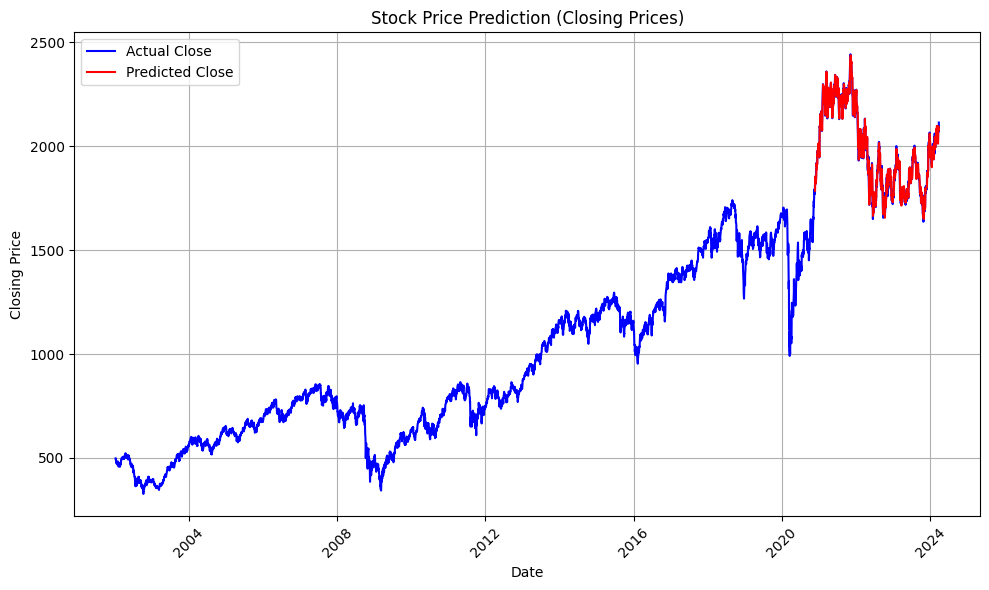

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['Date'],combined_df['Close'] , label='Actual Close', color='blue')
plt.plot(test_set['Date'],test_set['Predicted_close'] , label='Predicted Close', color='red')

plt.title('Stock Price Prediction (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Datasets to carry out the rest of the study (15-20 Datasets)

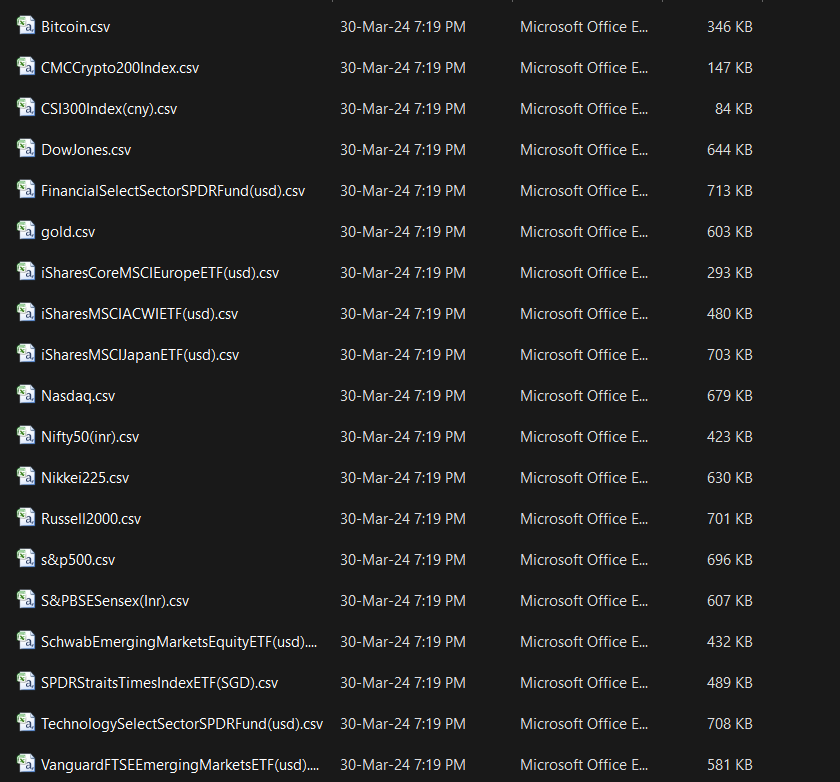

## Other Machine Learning models to experimentation   (4 Models)


*   Gradient Boosting Decision Tree
*   XGBoost
*   Random Forest





In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for GridSearchCV
param_grid_gbdt = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create GBDT model
gbdt = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_gbdt = GridSearchCV(gbdt, param_grid_gbdt, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbdt.fit(x_train, y_train)

# Get the best model from grid search
best_gbdt = grid_search_gbdt.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for GBDT:")
print(grid_search_gbdt.best_params_)

# Make predictions
y_train_pred_gbdt = best_gbdt.predict(x_train)
y_valid_pred_gbdt = best_gbdt.predict(x_valid)
y_test_pred_gbdt = best_gbdt.predict(x_test)

# Evaluate the model
train_rmse_gbdt = np.sqrt(mean_squared_error(y_train, y_train_pred_gbdt))
valid_rmse_gbdt = np.sqrt(mean_squared_error(y_valid, y_valid_pred_gbdt))
test_rmse_gbdt = np.sqrt(mean_squared_error(y_test, y_test_pred_gbdt))

print("Train RMSE (GBDT):", train_rmse_gbdt)
print("Validation RMSE (GBDT):", valid_rmse_gbdt)
print("Test RMSE (GBDT):", test_rmse_gbdt)

# Plotting

# Visualization for GBDT predictions
# Use the same approach as you did for SVR to visualize GBDT predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for GBDT:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Train RMSE (GBDT): 0.013672304415775835
Validation RMSE (GBDT): 0.014582414283639692
Test RMSE (GBDT): 0.01324016101376124


In [44]:
import xgboost as xgb

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

# Create XGBoost model
xgboost = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search_xgb = GridSearchCV(xgboost, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

# Get the best model from grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions
y_train_pred_xgb = best_xgb.predict(x_train)
y_valid_pred_xgb = best_xgb.predict(x_valid)
y_test_pred_xgb = best_xgb.predict(x_test)

# Evaluate the model
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
valid_rmse_xgb = np.sqrt(mean_squared_error(y_valid, y_valid_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print("Train RMSE (XGBoost):", train_rmse_xgb)
print("Validation RMSE (XGBoost):", valid_rmse_xgb)
print("Test RMSE (XGBoost):", test_rmse_xgb)

# Plotting

# Visualization for XGBoost predictions
# Use the same approach as you did for SVR to visualize XGBoost predictions.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found for XGBoost:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
Train RMSE (XGBoost): 0.013403329879093246
Validation RMSE (XGBoost): 0.014718366909305388
Test RMSE (XGBoost): 0.013263764093407833


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

# Create Random Forest model
random_forest = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Get the best model from grid search
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters found from grid search
print("Best hyperparameters found for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions
y_train_pred_rf = best_rf.predict(x_train)
y_valid_pred_rf = best_rf.predict(x_valid)
y_test_pred_rf = best_rf.predict(x_test)

# Evaluate the model
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
valid_rmse_rf = np.sqrt(mean_squared_error(y_valid, y_valid_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print("Train RMSE (Random Forest):", train_rmse_rf)
print("Validation RMSE (Random Forest):", valid_rmse_rf)
print("Test RMSE (Random Forest):", test_rmse_rf)

# Plotting

# Visualization for Random Forest predictions
# Use the same approach as you did for SVR to visualize Random Forest predictions.


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found for Random Forest:
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Train RMSE (Random Forest): 0.012334032868561797
Validation RMSE (Random Forest): 0.014458362781080189
Test RMSE (Random Forest): 0.01325271884933077
